In [1]:
def hex_from_cpt_array(cpt):
    cmyk_array = [0,0,0,0]
    absent_value = cpt[0]
    max_index = 1
    
    #Iterate through non-absent states to determine the index of max color
    for i in range(1, 4, 1):
        if cpt[i] > cpt[max_index]:
            max_index = i
    
    # Determine the max_color value
    max_color = 100 - (absent_value * 100)
    
    # Iterate through non-absent states to determine their color
    for j in range(1, 4, 1):
        if j == max_index:
            cmyk_array[j-1] = max_color
        else:
            color = (cpt[j] * max_color) / cpt[max_index]  # Regla de 3 para obtener la proporcion
            cmyk_array[j-1] = color
    
    # Transform the cmyk array to Hex color
    c = cmyk_array[1]
    m = cmyk_array[2]
    y = cmyk_array[0]
    k = cmyk_array[3]
    r = 255*(1.0-(c+k)/float(100))
    g = 255*(1.0-(m+k)/float(100))
    b = 255*(1.0-(y+k)/float(100))
    rgb = (int(r),int(g),int(b))
    hex = '#%02x%02x%02x' % rgb
    return hex


# No es el CMYK verdadero, es un CMYK de W3School, el verdadero se obtiene al transformar esta escala en RGB y de ahi a CMYK
def cmyk(cpt):
    cmyk_matrix = np.ndarray((len(cpt), 4), int)
    # Iteramos por las filas de tabla
    for i in range(len(cpt)):
        cmyk_array = [0, 0, 0, 0]
        absent_value = cpt[i][0]
        max_index = 1

        # Iterate through non-absent states to determine the index of max color
        for j in range(1, 4, 1):
            if cpt[i][j] > cpt[i][max_index]:
                max_index = j

        # Determine the max_color value
        max_color = 100 - (absent_value * 100)

        # Iterate through non-absent states to determine their color
        for j in range(1, 4, 1):
            if j == max_index:
                cmyk_array[j-1] = max_color
            else:
                color = (cpt[i][j] * max_color) / cpt[i][max_index]  # Regla de 3 para obtener la proporcion
                cmyk_array[j-1] = color

        # Add the color array to the matrix
        cmyk_matrix[i] = cmyk_array

    return cmyk_matrix

def cmyk_to_hex_matrix(cmyk_matrix):
    hex_array = []
    for i in range(0, len(cmyk_matrix)):
        cmyk_array = cmyk_matrix[i]
        c = cmyk_array[1]
        m = cmyk_array[2]
        y = cmyk_array[0]
        k = cmyk_array[3]
        r = 255*(1.0-(c+k)/float(100))
        g = 255*(1.0-(m+k)/float(100))
        b = 255*(1.0-(y+k)/float(100))
        rgb = (int(r),int(g),int(b))
        hex = '#%02x%02x%02x' % rgb
        hex_array.append(hex)
    return np.asarray(hex_array)


In [12]:
hex_from_cpt_array([0.0, 0.33, 0.33, 0.34])

'#070007'

# Venn diagram of CMYK color scale

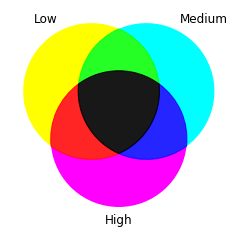

In [42]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles

# Generate main colors
low_color = hex_from_cpt_array([0.0, 1.0, 0.0, 0.0])
medium_color = hex_from_cpt_array([0.0, 0.0, 1.0, 0.0])
high_color = hex_from_cpt_array([0.0, 0.0, 0.0, 1.0])
low_medium_color = hex_from_cpt_array([0.0, 0.5, 0.5, 0.0])
low_high_color = hex_from_cpt_array([0.0, 0.5, 0.0, 0.5])
low_medium_high_color = hex_from_cpt_array([0.0, 0.3333, 0.3333, 0.3334])
medium_high_color = hex_from_cpt_array([0.0, 0.0, 0.5, 0.5])

# Make a Basic Venn
plt.figure(figsize=(4,4))
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('Low', 'Medium', 'High'), set_colors=(low_color, medium_color, high_color), alpha=1)

# Hide text 
v.get_label_by_id('001').set_text('')
v.get_label_by_id('010').set_text('')
v.get_label_by_id('011').set_text('')
v.get_label_by_id('100').set_text('')
v.get_label_by_id('101').set_text('')
v.get_label_by_id('110').set_text('')
v.get_label_by_id('111').set_text('')

# Set correct interpolation colors
v.get_patch_by_id('011').set_color(medium_high_color)
v.get_patch_by_id('011').set_alpha(0.85)
v.get_patch_by_id('101').set_color(low_high_color)
v.get_patch_by_id('101').set_alpha(0.85)
v.get_patch_by_id('110').set_color(low_medium_color)
v.get_patch_by_id('110').set_alpha(0.85)
v.get_patch_by_id('111').set_color(low_medium_high_color)
v.get_patch_by_id('111').set_alpha(0.9)

 
# Show it
plt.show()

# All attributes

In [136]:
import pandas
import numpy as np

# Cargamos las CPTs de cada uno de los genes para el cluster correspondiente en forma de pandas DF (uno por cada cluster)
marginals = pandas.read_csv("heatmap_cpts/marginals.csv").values
cluster_1 = pandas.read_csv("heatmap_cpts/cpts_1.csv").values
cluster_2 = pandas.read_csv("heatmap_cpts/cpts_2.csv").values
cluster_3 = pandas.read_csv("heatmap_cpts/cpts_3.csv").values
cluster_4 = pandas.read_csv("heatmap_cpts/cpts_4.csv").values
cluster_5 = pandas.read_csv("heatmap_cpts/cpts_5.csv").values
cluster_6 = pandas.read_csv("heatmap_cpts/cpts_6.csv").values
cluster_7 = pandas.read_csv("heatmap_cpts/cpts_7.csv").values
cluster_8 = pandas.read_csv("heatmap_cpts/cpts_8.csv").values
cluster_9 = pandas.read_csv("heatmap_cpts/cpts_9.csv").values

# Generamos los vectores de colores para mostrarlos en forma de tabla
marginal_colors = cmyk_to_hex_matrix(cmyk(marginals))
cluster_1_colors = cmyk_to_hex_matrix(cmyk(cluster_1))
cluster_2_colors = cmyk_to_hex_matrix(cmyk(cluster_2))
cluster_3_colors = cmyk_to_hex_matrix(cmyk(cluster_3))
cluster_4_colors = cmyk_to_hex_matrix(cmyk(cluster_4))
cluster_5_colors = cmyk_to_hex_matrix(cmyk(cluster_5))
cluster_6_colors = cmyk_to_hex_matrix(cmyk(cluster_6))
cluster_7_colors = cmyk_to_hex_matrix(cmyk(cluster_7))
cluster_8_colors = cmyk_to_hex_matrix(cmyk(cluster_8))
cluster_9_colors = cmyk_to_hex_matrix(cmyk(cluster_9))

# Generamos un dataFrame con los colores de las CPTs de los genes
df = pandas.DataFrame()
df.insert(loc = 0, column="Marginal", value=marginal_colors)
df.insert(loc = 1, column="Cluster_1", value=cluster_1_colors)
df.insert(loc = 2, column="Cluster_2", value=cluster_2_colors)
df.insert(loc = 3, column="Cluster_3", value=cluster_3_colors)
df.insert(loc = 4, column="Cluster_4", value=cluster_4_colors)
df.insert(loc = 5, column="Cluster_5", value=cluster_5_colors)
df.insert(loc = 6, column="Cluster_6", value=cluster_6_colors)
df.insert(loc = 7, column="Cluster_7", value=cluster_7_colors)
df.insert(loc = 8, column="Cluster_8", value=cluster_8_colors)
df.insert(loc = 9, column="Cluster_9", value=cluster_9_colors)

# gene names
gene_names_df = pandas.read_csv("heatmap_cpts/gene_names.csv")

# Transponemos el DF y le asignamos los nombres de los genes
df = df.transpose()
df.columns = gene_names_df.columns

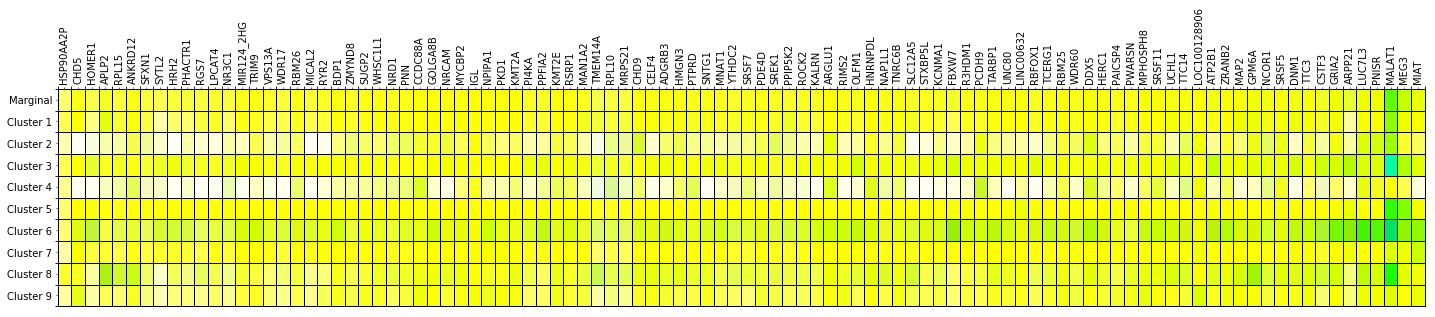

In [349]:
import matplotlib.ticker as ticker

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
fig = plt.figure(figsize=(24,4))
ax = plt.gca()
tb = Table(ax, bbox = [0,0,1,1])
nrows = 10
ncols = 100
nrows, ncols = data.shape
width, height = 1.0 / ncols, 1.0 / nrows


# Add cells
for (i,j), val in np.ndenumerate(df):
    color = df.values[i,j]
    tb.add_cell(i, j, width = width, height = height, loc='center', facecolor=color)

# Create table
table = ax.add_table(tb)

# Prepare Y axis
ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=11))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.NullFormatter())
minor_y_labels = ["Cluster 9","Cluster 8","Cluster 7","Cluster 6","Cluster 5","Cluster 4","Cluster 3","Cluster 2","Cluster 1","Marginal"]
minor_y_labels_with_spaces = [""]
for i in range(0, 20):
    if i%2==0:
        minor_y_labels_with_spaces.append("")
    else:
        j = int(i/2)
        minor_y_labels_with_spaces.append(minor_y_labels[j])
ax.set_yticklabels(minor_y_labels_with_spaces, minor=True)

# Prepare X axis
ax.xaxis.set_major_locator(ticker.LinearLocator(numticks=101))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.005))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
# Generate the X axis labels
minor_x_labels = df.columns
minor_x_labels_with_spaces = [""]
for i in range(0, 200):
    if i%2==0:
        minor_x_labels_with_spaces.append("")
    else:
        j = int(i/2)
        minor_x_labels_with_spaces.append(minor_x_labels[j])
ax.set_xticklabels(minor_x_labels_with_spaces, minor=True, rotation=90)

plt.show()

# 20 most relevant attributes

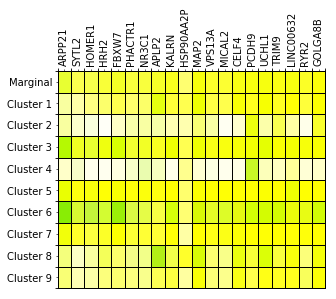

In [350]:
# Filtramos las columnas con los 20 genes mas relevantes
most_relevant_genes_20 = ["ARPP21", "SYTL2", "HOMER1", "HRH2", "FBXW7", "PHACTR1", "NR3C1", "APLP2", "KALRN", "HSP90AA2P", "MAP2", "VPS13A", "MICAL2", 
                          "CELF4", "PCDH9", "UCHL1", "TRIM9", "LINC00632", "RYR2", "GOLGA8B"]
df_20 = df[most_relevant_genes_20]

import matplotlib.ticker as ticker

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
fig = plt.figure(figsize=(4.8,4))
ax = plt.gca()
tb = Table(ax, bbox = [0,0,1,1])
nrows = 10
ncols = 100
nrows, ncols = data.shape
width, height = 1.0 / ncols, 1.0 / nrows


# Add cells
for (i,j), val in np.ndenumerate(df_20):
    color = df_20.values[i,j]
    tb.add_cell(i, j, width = width, height = height, loc='center', facecolor=color)

# Create table
table = ax.add_table(tb)

# Prepare Y axis
ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=11))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.NullFormatter())
minor_y_labels = ["Cluster 9","Cluster 8","Cluster 7","Cluster 6","Cluster 5","Cluster 4","Cluster 3","Cluster 2","Cluster 1","Marginal"]
minor_y_labels_with_spaces = [""]
for i in range(0, 20):
    if i%2==0:
        minor_y_labels_with_spaces.append("")
    else:
        j = int(i/2)
        minor_y_labels_with_spaces.append(minor_y_labels[j])
ax.set_yticklabels(minor_y_labels_with_spaces, minor=True)

# Prepare X axis
ax.xaxis.set_major_locator(ticker.LinearLocator(numticks=21))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.025))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
# Generate the X axis labels
minor_x_labels = df_20.columns
minor_x_labels_with_spaces = [""]
for i in range(0, 40):
    if i%2==0:
        minor_x_labels_with_spaces.append("")
    else:
        j = int(i/2)
        minor_x_labels_with_spaces.append(minor_x_labels[j])
ax.set_xticklabels(minor_x_labels_with_spaces, minor=True, rotation=90)

plt.show()

# Cluster proportion

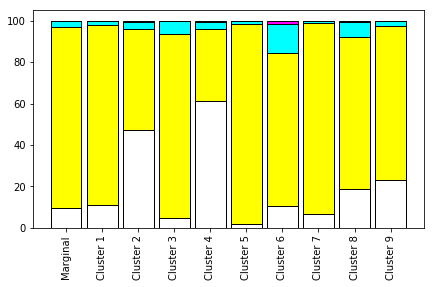

In [408]:
import pandas
import numpy as np

# Load the CSV with the average conditional probabilities of each cluster
average_cond_probs = pandas.read_csv("heatmap_cpts/average_cond_probs.csv")

# Given that not all the probabilities strictly sum up to 1, we apply normalization (to avoid discrepancies in the figure)
sum_per_row = np.sum(average_cond_probs, axis=1)
mult = 1.0 / sum_per_row
for i in range(0,10):
    average_cond_probs.iloc[i] = average_cond_probs.iloc[i] * mult[i]

# Separate values according to the variable state
absent_bar_probs = average_cond_probs["absent"]*100
low_bar_probs = average_cond_probs["low"]*100
medium_bar_probs = average_cond_probs["medium"]*100
high_bar_probs = average_cond_probs["high"]*100

# Generate bar colors
low_bar_color = hex_from_cpt_array([0.0, 1.0, 0.0, 0.0])
medium_bar_color = hex_from_cpt_array([0.0, 0.0, 1.0, 0.0])
high_bar_color = hex_from_cpt_array([0.0, 0.0, 0.0, 1.0])

# Plot generation
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
fig = plt.figure(figsize=(7,4))
ax = plt.gca()
barWidth = 0.85
indices = [0,1,2,3,4,5,6,7,8,9]
names = ('Marginal', 'Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9')
# Create absent bars
plt.bar(indices, absent_bar_probs, color="white", edgecolor='black', width=barWidth)
# Create low Bars
plt.bar(indices, low_bar_probs, bottom=absent_bar_probs, color=low_bar_color, edgecolor='black', width=barWidth)
# Create medium Bars
plt.bar(indices, medium_bar_probs, bottom=[i+j for i,j in zip(low_bar_probs, absent_bar_probs)], color=medium_bar_color, edgecolor='black', width=barWidth)
# Create high Bars
plt.bar(indices, high_bar_probs, bottom=[i+j+z for i,j,z in zip(medium_bar_probs, low_bar_probs, absent_bar_probs)], color=high_bar_color, edgecolor='black', width=barWidth)
 
# Custom x axis
plt.xticks(indices, names, rotation=90)
 
# Show graphic
plt.show()

# Cluster probabilities
Mostrar con algun tipo de chart cuales son los clusters mas grandes y con que porcentaje

In [ ]:
probs = [13.97, 3.61, 14.79, 2.34, 35.32, 2.40, 14.78, 5.51, 7.27]

